<a href="https://colab.research.google.com/github/daffinyyy/Treinamento_Perceptron/blob/main/treinamentoPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Treinamento de Perceptron  
Aluna: Aline Daffiny Ferreira Gomes  
Orientadora: Profa. Dra. Elloa B Guedes

##2. Detalhamento da Atividade
A atividade será dividida em três partes, cada uma a ser apresentada a seguir. Todas as atividades tem como entrada um arquivo txt com conteúdo em binário descrevendo um **numpy.ndarray** salvo previamente contendo múltiplos exemplos de dimensões (1,3), ou seja, tem dimensões (m, 1, 3), em que m varia a depender do documento considerado, de 800 a 1000, em média. Cada exemplo representa um ponto no R<sup>2</sup> e o seu respectivo rótulo, isto é, tem-se (x<sub>1</sub>, x<sub>2</sub>, y<sub>d</sub>). Os valores de y<sub>d</sub> correspondem às classes discretas e binárias 0 e 1, em que a classe 0 deve ser denotada na cor vermelha e a classe 1 deve ser denotada na cor azul.

###2.1. Parte I – Resolvendo um Problema Linearmente Separável  
Nesta parte, todas as equipes devem usar o arquivo **dataAll.txt** e construir o algoritmo de treinamento do neurônio perceptron para resolver o problema de classificação proposto. Alguns aspectos
devem ser considerados:
1. As equipes devem utilizar a função de ativação degrau com ϑ = 0;
2. O valor da taxa de aprendizado deve ser igual a η = 0,1;
3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de
distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve
ser impresso no início da execução do algoritmo;
4. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os
exemplos presentes no conjunto de treinamento;
5. Ao final, deve-se imprimir:
- O número total de ajustes no vetor de pesos;
- O número de épocas até a convergência;
- O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

**Importação de bibliotecas**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Arrumando o dataset**

In [2]:
dataAll = np.fromfile("/content/dataAll.txt")
#dataAll

n_rows = dataAll.size / 3
matriz_dataAll = dataAll.reshape(int(n_rows), 3)
#matriz_dataAll

X = matriz_dataAll[:, :-1] #[linha, coluna]
y = matriz_dataAll[:, -1]
#X
#y

**Valores pré-definidos**

In [3]:
#função de ativação
def f_ativ(x):
  theta = 0
  if x >= theta:
    return 1
  else:
    return 0

#taxa de aprendizado
t_aprend = 0.1

#pesos
w = np.random.uniform(-0.5, 0.5, 3)  #(x1, x2, bias)
print(f"pesos iniciais: {w}")


pesos iniciais: [-0.39572164  0.26235494  0.16819341]


In [4]:
#SE RODAR ESSA CÉLULA DNV VAI CONCATENAR POR CIMA
#adicionando o bias no input
x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))
#X

**O perceptron**

In [5]:
def Perceptron(X, w, y, t_aprend):
  #pra imprimir dps
  n_epocas = 0
  n_ajustes = 0

  while True:
    ajustes = 0

    for i in range(X.shape[0]):
      x = np.dot(X[i], w) #aplica os pesos
      pred = f_ativ(x)  #passa pela função
      erro = y[i] - pred

      if erro != 0:
        w += t_aprend * erro * X[i] #delta
        ajustes += 1
        n_ajustes += 1

    n_epocas += 1
    if ajustes == 0:
      break

  return n_epocas, n_ajustes

#treianmento
n_epocas, n_ajustes = Perceptron(X, w, y, t_aprend)

total de épocas: 16
total de ajustes: 198



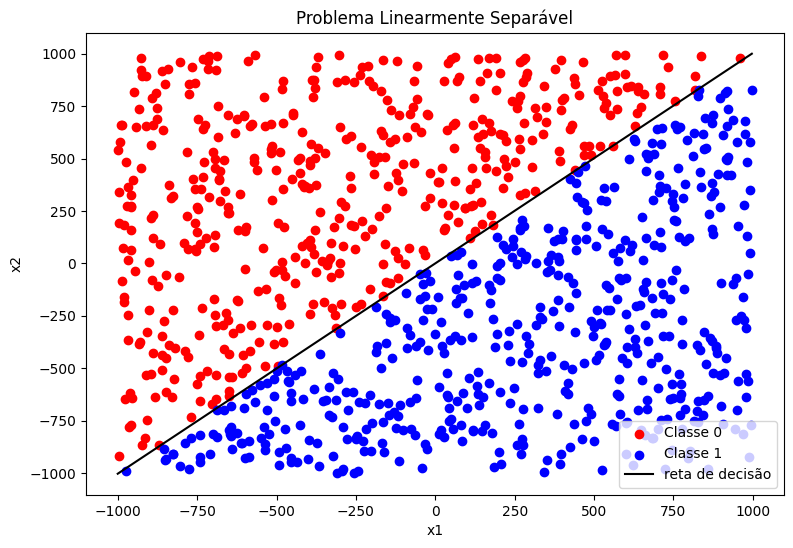

In [6]:
#do treinamento
print(f"total de épocas: {n_epocas}")
print(f"total de ajustes: {n_ajustes}")

print() #só pra criar um espaço entre os dados

#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 1], X[y == 0, 2], color='red', label='Classe 0')
plt.scatter(X[y == 1, 1], X[y == 1, 2], color='blue', label='Classe 1')

x_val = [min(X[:, 1]), max(X[:, 1])]
y_val = - (w[1] * np.array(x_val) + w[0]) / w[2]
plt.plot(x_val, y_val, label='reta de decisão', color='black')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema Linearmente Separável')
plt.legend()
plt.show()

###2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável
Todas as equipes devem considerar o arquivo **dataHoldout.txt** e apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.
Em seguida, os exemplos devem ser aleatoriamente divididos em duas partições, uma delas contendo 70% dos exemplos (treinamento) e outra contendo 30% (teste). A semente de aleatoriedade deve ser igual ao identificador da equipe. Embora o problema não seja linearmente separável, vamos utilizar os dados de treinamento para obter uma reta de separação das classes com o neurônio Perceptron (solução possível). O neurônio em questão tem função de ativação degrau com ϑ = 0, os
valores de η e de inicialização de pesos devem seguir as recomendações da literatura e os pesos do neurônio devem ser aleatoriamente escolhidos a partir de U(−0,5, + 0,5). Execute o algoritmo por 100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em ordem aleatória.  
Efetue a previsão da saída deste neurônio para todos os exemplos do conjunto de teste, comparandoa com a saída desejada e responda ao que se pede:
1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;
2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score. Para estes cálculos, está liberada a utilização de sklearn.metrics;
4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.  

Apresente dois gráficos com a solução obtida pelo neurônio Perceptron, mas um deles contendo os dados de treinamento e o outro contendo os dados de teste. Disponha tais gráficos lado a lado.

**Arrumando o dataset**

In [7]:
dataHoldout = np.fromfile("/content/dataHoldout.txt")
#dataHoldout

n_rows = dataHoldout.size / 3
matriz_dataHoldout = dataHoldout.reshape(int(n_rows), 3)
#matriz_dataHoldout

X = matriz_dataHoldout[:, :-1] #[linha, coluna]
y = matriz_dataHoldout[:, -1]
#X
#y

**Mostrando que não é linearmente separável**

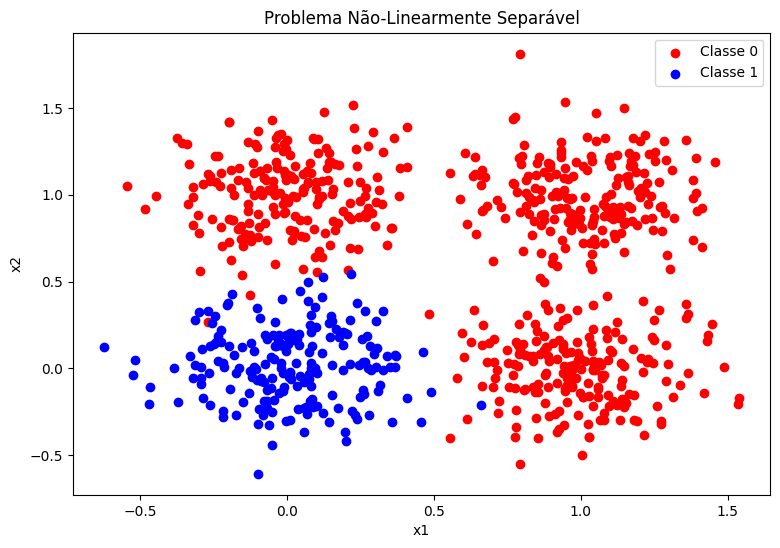

In [8]:
#grafico
plt.figure(figsize=(9, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Problema Não-Linearmente Separável')
plt.legend()
plt.show()

**Valores pré-definidos**

In [9]:
#função de ativação e taxa de aprendizado definidos no exemplo anterior

#pesos
w = np.random.uniform(-0.5, 0.5, 3)  #(x1, x2, bias)
print(f"pesos iniciais: {w}")

pesos iniciais: [-0.40729888  0.13566338  0.23285897]


In [10]:
#SE RODAR ESSA CÉLULA DNV VAI CONCATENAR POR CIMA
#adicionando o bias no input
x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))
#X

**Split dos dados**

In [11]:
#aleatorizando
import random
random.seed(0)

#fazendo o split dos dados
train_size = int(0.7 * len(X))
#print(train_size)

index = [] #aleatorizando os indices pra conseguir parear X e y
for i in range(len(X)):
  index.append(i)
random.shuffle(index)

index_train = index[:train_size] #treino vai do inicio até o split
#print(index_train)
#print(len(index_train))
index_test = index[train_size:] #teste vai do slit até o final
#print(index_test)
#print(len(index_test))

X_train = X[index_train]
y_train = y[index_train]
#print(y_train)
#valores, contagens = np.unique(y_train, return_counts=True)
#print(valores)
#print(contagens)


X_test = X[index_test]
y_test = y[index_test]
#print(y_test)
#valores, contagens = np.unique(y_test, return_counts=True)
#print(valores)
#print(contagens)

**Treinamento do Perceptron**

🚨⚠️ NÃO ENTENDI  
"Execute o algoritmo por
100 épocas, mas a cada época apresente os exemplos disponíveis com conjunto de treinamento em
ordem aleatória."

In [12]:
#trocando a convergência pelas épocas
def train_Perceptron(X, w, y, t_aprend, n_epocas):
  count_epocas = 0

  while True:

    for i in range(X.shape[0]):
      x = np.dot(X[i], w) #aplica os pesos
      pred = f_ativ(x)  #passa pela função
      erro = y[i] - pred

      if erro != 0:
        w += t_aprend * erro * X[i] #delta

    count_epocas += 1
    if count_epocas >= n_epocas:
      break

  return w

#treianmento
n_epocas = 100
pesos_f = train_Perceptron(X_train, w, y_train, t_aprend, n_epocas)

**Teste do Perceptron**

In [13]:
def test_Perceptron(X, w, y):
  acertos = 0
  predicoes = []

  for i in range(X.shape[0]):
    x = np.dot(X[i], w) #aplica os pesos
    pred = f_ativ(x)  #passa pela função
    predicoes.append(pred)
    if pred == y[i]:
      acertos += 1

  return acertos, predicoes

n_acertos, predicoes = test_Perceptron(X_test, pesos_f, y_test)
#print(n_acertos)
#print(predicoes)